In [1]:
import os

import pandas as pd
import numpy as np

import geopandas as gpd
import contextily as ctx

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
crs_init='epsg:4326'
crs_output='epsg:3857'

In [3]:
os.chdir(r'F:\OneDrive\Materials\GIS\practice\practice_2')

In [4]:
df=pd.read_csv(r'202011-citibike-tripdata.csv')
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,521,2020-11-01 00:00:07.0150,2020-11-01 00:08:48.3010,3467,W Broadway & Spring St,40.724947,-74.001659,350,Clinton St & Grand St,40.715595,-73.987030,40405,Subscriber,1989,1
1,492,2020-11-01 00:00:10.8080,2020-11-01 00:08:23.3170,3557,40 Ave & 9 St,40.757420,-73.945133,3557,40 Ave & 9 St,40.757420,-73.945133,46504,Subscriber,1970,2
2,1979,2020-11-01 00:00:14.7040,2020-11-01 00:33:14.1640,3085,Roebling St & N 4 St,40.714690,-73.957390,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370,37452,Subscriber,1989,2
3,2382,2020-11-01 00:00:14.7070,2020-11-01 00:39:57.0030,3783,Cliff St & Fulton St,40.708380,-74.004950,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,40417,Subscriber,1981,1
4,166,2020-11-01 00:00:15.9690,2020-11-01 00:03:02.8980,422,W 59 St & 10 Ave,40.770513,-73.988038,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,35776,Subscriber,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736699,257,2020-11-30 23:58:44.6840,2020-12-01 00:03:01.9470,324,DeKalb Ave & Hudson Ave,40.689888,-73.981013,421,Clermont Ave & Park Ave,40.695734,-73.971297,49932,Subscriber,1992,1
1736700,617,2020-11-30 23:58:45.6210,2020-12-01 00:09:02.8300,439,E 4 St & 2 Ave,40.726281,-73.989780,3709,W 15 St & 6 Ave,40.738046,-73.996430,38817,Customer,1969,0
1736701,116,2020-11-30 23:58:45.7200,2020-12-01 00:00:41.9570,3616,Steinway St & 28 Ave,40.765625,-73.913669,3600,31 Ave & Steinway St,40.761149,-73.917007,32874,Subscriber,1980,1
1736702,409,2020-11-30 23:59:20.1480,2020-12-01 00:06:09.7540,3521,Lenox Ave & W 111 St,40.798786,-73.952300,3325,E 95 St & 3 Ave,40.784903,-73.950503,36675,Customer,2001,1


In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
endsta_cols=['end station id','end station name','end station latitude','end station longitude']

In [7]:
df_endsta=df.loc[:,endsta_cols]
df_endsta

,end station id,end station name,end station latitude,end station longitude
0,350,Clinton St & Grand St,40.715595,-73.987030
1,3557,40 Ave & 9 St,40.757420,-73.945133
2,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370
3,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930
4,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886
...,...,...,...,...
1736699,421,Clermont Ave & Park Ave,40.695734,-73.971297
1736700,3709,W 15 St & 6 Ave,40.738046,-73.996430
1736701,3600,31 Ave & Steinway St,40.761149,-73.917007
1736702,3325,E 95 St & 3 Ave,40.784903,-73.950503


In [8]:
df_endsta.drop_duplicates(inplace=True,ignore_index=True)

In [9]:
df_endsta

,end station id,end station name,end station latitude,end station longitude
0,350,Clinton St & Grand St,40.715595,-73.987030
1,3557,40 Ave & 9 St,40.757420,-73.945133
2,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370
3,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930
4,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886
...,...,...,...,...
1156,3639,Harborside,40.719252,-74.034234
1157,3203,Hamilton Park,40.727596,-74.044247
1158,4118,Liberty St & Nassau St,40.708589,-74.009355
1159,4219,W 35 St & 9 Ave,40.754145,-73.996089


In [10]:
endPoints=gpd.points_from_xy(df_endsta['end station longitude'],df_endsta['end station latitude'])

In [11]:
gdf_endsta=gpd.GeoDataFrame(df_endsta,geometry=endPoints,crs=crs_init)
gdf_endsta

,end station id,end station name,end station latitude,end station longitude,geometry
0,350,Clinton St & Grand St,40.715595,-73.987030,POINT (-73.98703 40.71560)
1,3557,40 Ave & 9 St,40.757420,-73.945133,POINT (-73.94513 40.75742)
2,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370,POINT (-73.93637 40.71666)
3,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,POINT (-73.98093 40.77967)
4,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,POINT (-73.98289 40.77748)
...,...,...,...,...,...
1156,3639,Harborside,40.719252,-74.034234,POINT (-74.03423 40.71925)
1157,3203,Hamilton Park,40.727596,-74.044247,POINT (-74.04425 40.72760)
1158,4118,Liberty St & Nassau St,40.708589,-74.009355,POINT (-74.00935 40.70859)
1159,4219,W 35 St & 9 Ave,40.754145,-73.996089,POINT (-73.99609 40.75415)


### Plot-1: end stations without base map, in WGS84

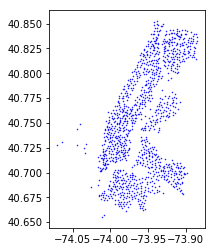

In [12]:
gdf_endsta.plot(color="blue",marker=".",markersize=1)

### Plot-2: end stations without base map, in Web Mercator

In [13]:
data=gdf_endsta.to_crs(crs_output)

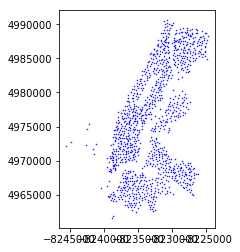

In [14]:
data.plot(color="blue",marker=".",markersize=1)

### Plot-3: end stations with base map, in Web Mercator, using the add_basemap method to get a background map from the default provider

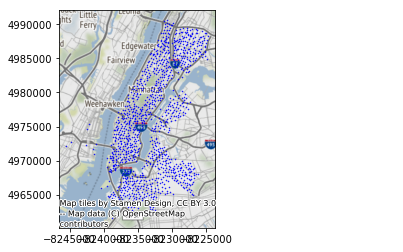

In [15]:
fig,ax=plt.subplots()

ax.set_aspect('equal')

data.plot(ax=ax,color="blue",marker=".",markersize=1)

ctx.add_basemap(ax=ax, zoom=11)

### Plot-4: end stations with base map, in Web Mercator, accessing the tile of the desired place with a text-based search, specifying a provider

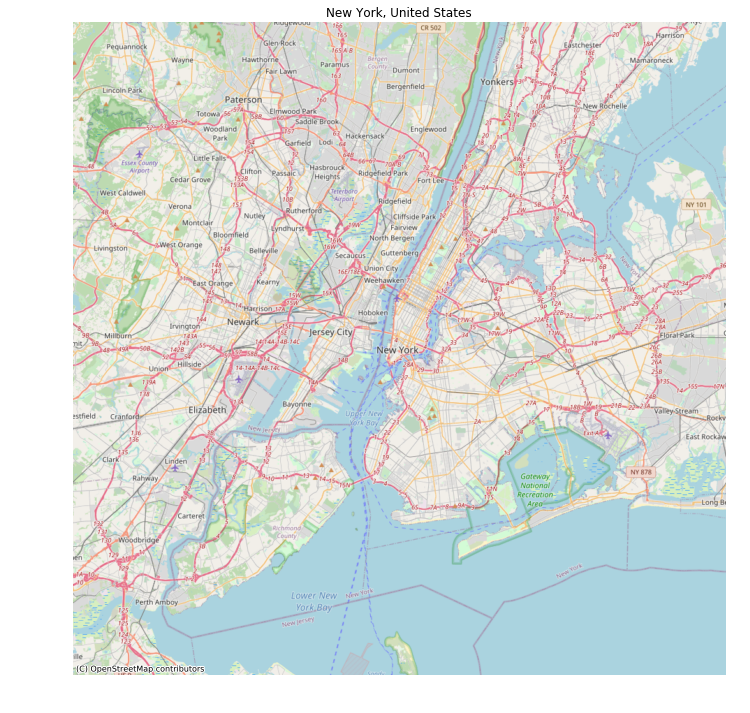

In [16]:
osm=ctx.providers.OpenStreetMap.Mapnik
newyork=ctx.Place("New York",zoom=11,source=osm)
newyork.plot()

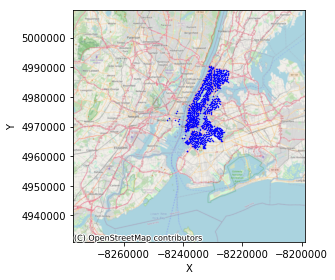

In [17]:
fig,ax=plt.subplots()

ax.set_aspect('equal')

newyork.plot(ax=ax)

data.plot(ax=ax,color="blue",marker=".",markersize=1)

plt.tight_layout()

### Plot-5: end stations with base map, in Web Mercator, accessing the desired tile using a bounding baox of coordinates, using the default provider

In [18]:
west, south, east, north=bbox=data.total_bounds
bbox

array([-8245552.76154588,  4961645.31530709, -8224763.54417339,
        4990573.23263695])

In [27]:
img,ext=ctx.bounds2img(west,south,east,north,zoom=12)

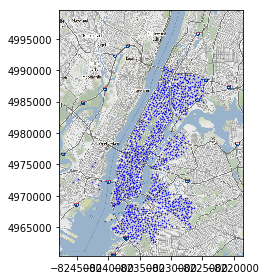

In [28]:
fig,ax=plt.subplots()

ax.set_aspect('equal')

ax.imshow(img,extent=ext)

data.plot(ax=ax,color="blue",marker=".",markersize=1)

plt.tight_layout()

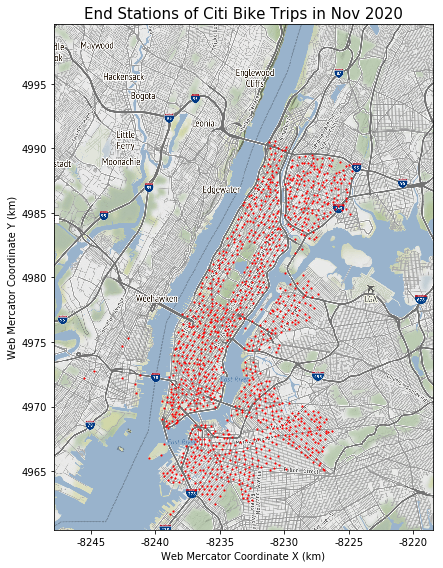

In [29]:
fig,ax=plt.subplots(figsize=(8,8))

ax.set_aspect('equal')

ax.imshow(img,extent=ext)

data.plot(ax=ax,color="red",marker=".",markersize=5)

ax.set_title("End Stations of Citi Bike Trips in Nov 2020",size=15)
ax.set_xlabel("Web Mercator Coordinate X (km)")
ax.set_ylabel("Web Mercator Coordinate Y (km)")

ax.ticklabel_format(useOffset=False,style='plain')

scale_x = 1e3
scale_y = 1e3
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks_x)

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.tight_layout()

outfp=os.path.join("output","endsta_nov2020_py.png")
plt.savefig(outfp,dpi=300)

### Plot-5: end stations with base map, in Web Mercator, accessing the desired tile using a bounding box of coordinates, using the default provider, saving the raster file to make map in ArcMap 

In [30]:
basefp=os.path.join("output","basemap.tif")
endstafp=os.path.join("output","endsta.shp")

In [31]:
west, south, east, north=bbox=data.total_bounds
bbox

array([-8245552.76154588,  4961645.31530709, -8224763.54417339,
        4990573.23263695])

In [32]:
img,ext=ctx.bounds2raster(west,south,east,north,path=basefp,zoom=12)

In [34]:
data.rename(columns={"end station id":"endid",
                     "end station name":"endname",
                     "end station latitude":"end_lat",
                     "end station longitude":"end_lon"},inplace=True)

In [35]:
assert np.all(data.columns.str.len() <= 10), \
"Column names will be truncated when saving as shapefile!"

In [36]:
data.to_file(endstafp)